In [1]:
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
# from adjustText import adjust_text
from Bio import SeqIO
from Bio.Seq import Seq
%matplotlib inline

# import gzip
# from cyvcf2 import VCF

from matplotlib import gridspec
from matplotlib.gridspec import GridSpec

from itertools import combinations
from ast import literal_eval

import sys
import os

home_dir = '~/Documents/Stanford/Research/EvolvingFront/'
home_dir = os.path.expanduser(home_dir)

tools_path = f'{home_dir}/code/processing/tools/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools as tools

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()



In [2]:
merged_fitness = p.read_csv(f'{home_dir}/data/fitness_withMutations.csv',index_col=0)

In [3]:
gene_hit_anc_df = p.read_csv(f'{home_dir}/data/WGS/intermediate_files/EvolvingFront_WGS_RepeatHitGenes_byAncestor.csv',index_col=0)

all_ancs = gene_hit_anc_df.groupby('gene',as_index=False).sum()

putative_causal_genes = all_ancs[all_ancs['count']>2].sort_values(['count','gene'],ascending=[False,True])['gene'].values


In [4]:
putative_causal_genes

array(['KSP1', 'PUF3', 'PAB1', 'RTG2', 'CIT1', 'ARO80', 'GSH1', 'MKS1',
       'SSK2', 'MKT1', 'MIT1', 'ALD5', 'GPB2', 'KGD1', 'MAE1', 'MDH1',
       'TFA1', 'AIM17', 'ATG26', 'IRA1', 'IRA2', 'PLB3', 'VPS53',
       'YGR283C', 'YPK9'], dtype=object)

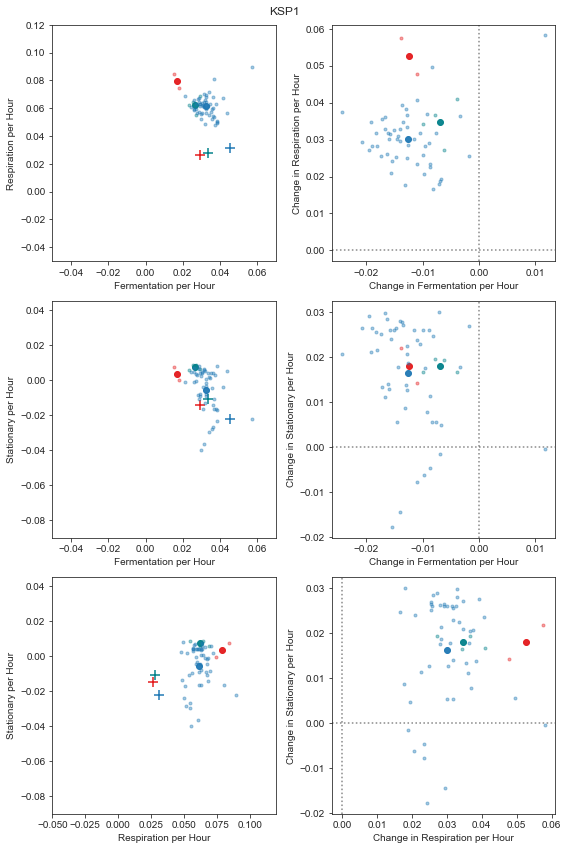

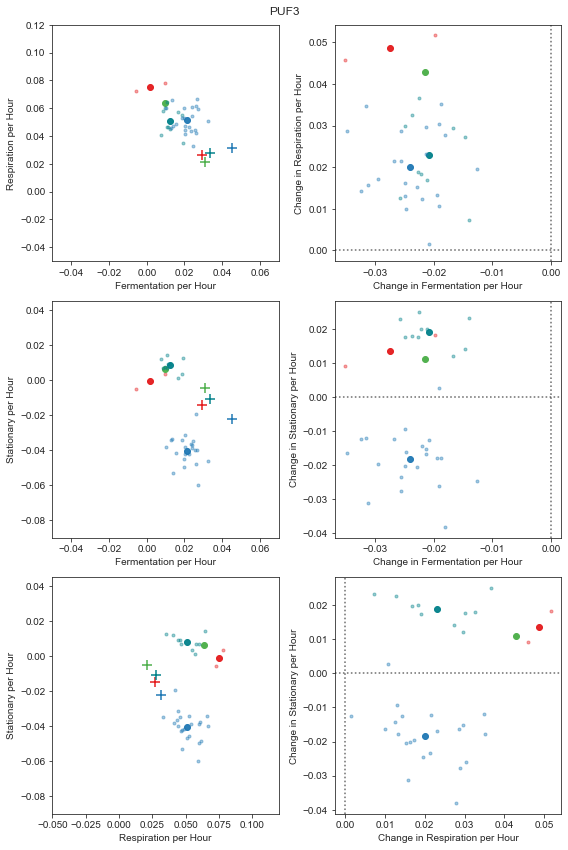

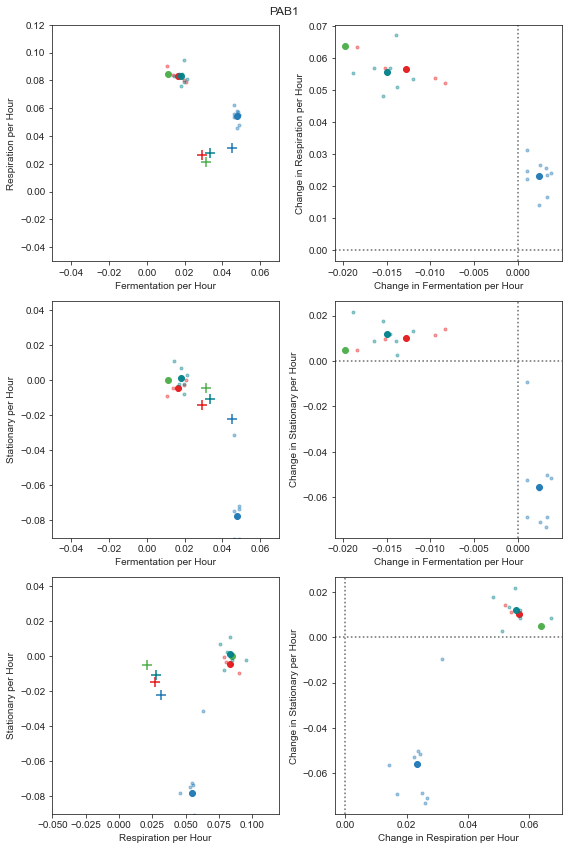

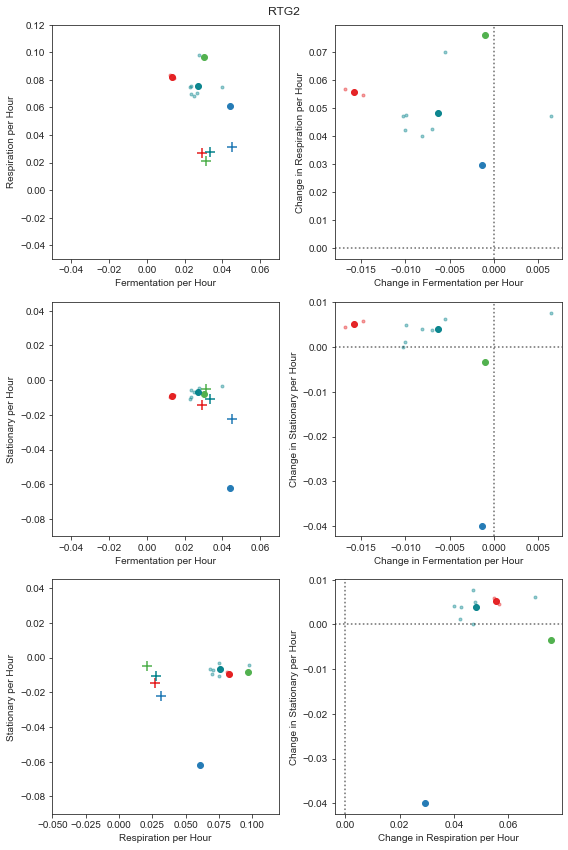

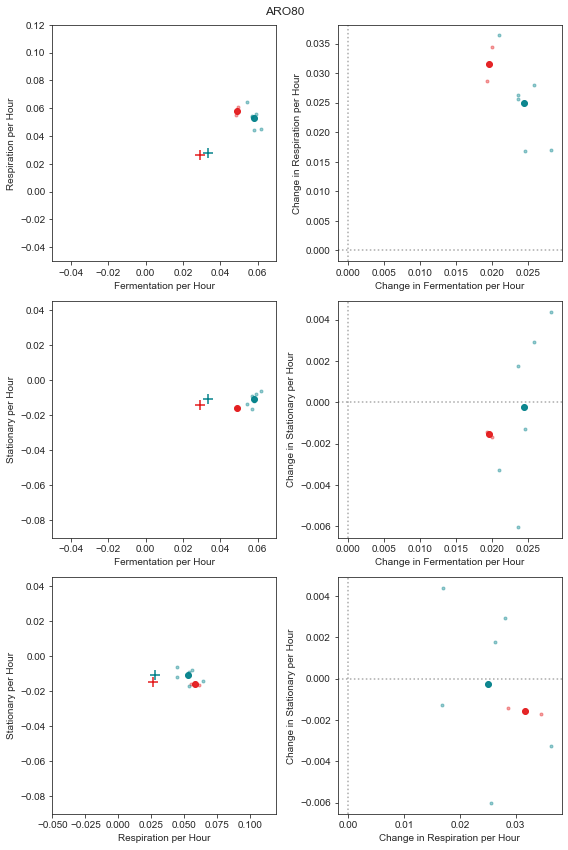

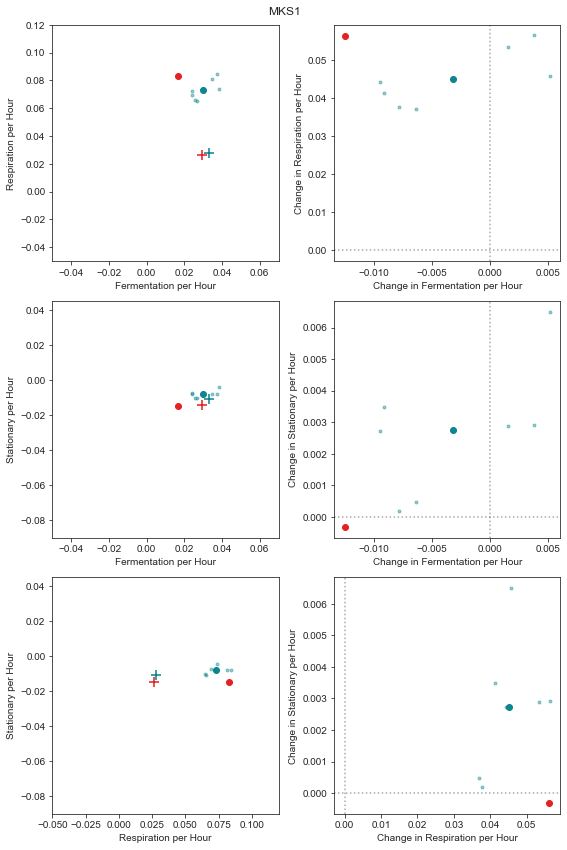

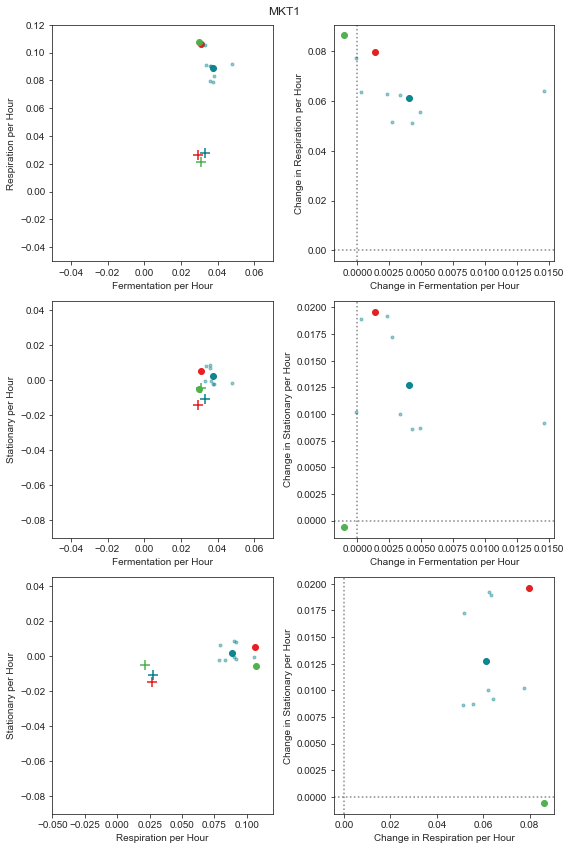

In [15]:

this_study = merged_fitness[merged_fitness['source_publication']=='This_study']

labels = {'FerPerHour':'Fermentation per Hour','ResPerHour':'Respiration per Hour','StaPerHour':'Stationary per Hour'}
lims = {'FerPerHour':[-0.05,0.07],'ResPerHour':[-0.05,0.12],'StaPerHour':[-0.09,0.045]}


for causal_gene in putative_causal_genes:
    
    this_gene = this_study[this_study['gene']==causal_gene]
    
    ancestors_with_gene = np.unique(this_gene['ancestor'].values)
    
#     if len(th)
    
    if (len(ancestors_with_gene) > 1) and (len(this_gene)>4):
        
        plt.figure(figsize=(8,12))
        plt.suptitle(causal_gene)
        
        for count,(xdata,ydata) in enumerate(combinations(['FerPerHour','ResPerHour','StaPerHour'],2)):
            
    
            for ancestor in ancestors_with_gene:
                
                background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[ancestor]]

                plt.subplot(3,2,2*count+1)
                    
                plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=tools.anc_color_map[ancestor],s=100)
                
                this_anc = this_gene[this_gene['ancestor']==ancestor]
                
                centroid = tools.centroid(this_anc[[xdata,ydata]].values)

                plt.scatter(this_anc[xdata].values,this_anc[ydata].values,
                            color=tools.anc_color_map[ancestor],alpha=0.4,marker='.')
                
                plt.scatter(centroid[0],centroid[1],
                            color=tools.anc_color_map[ancestor],alpha=0.95,marker='o')
                
                plt.xlim(lims[xdata][0],lims[xdata][1])
                plt.ylim(lims[ydata][0],lims[ydata][1])

                plt.xlabel(labels[xdata])
                plt.ylabel(labels[ydata])
                
                plt.subplot(3,2,2*count+2)
                
                differences = (this_anc[xdata].values-background_mutant[xdata].values,
                               this_anc[ydata].values-background_mutant[ydata].values)
                
                plt.scatter(differences[0],differences[1],
                            color=tools.anc_color_map[ancestor],alpha=0.4,marker='.')
                
                if len(differences[0]) > 0:
                    c_differences = (centroid[0]-background_mutant[xdata].values,
                               centroid[1]-background_mutant[ydata].values)
                    plt.scatter(c_differences[0],c_differences[1],
                                color=tools.anc_color_map[ancestor],alpha=0.95,marker='o')
                
#                 plt.xlim(lims[xdata][0],lims[xdata][1])
#                 plt.ylim(lims[ydata][0],lims[ydata][1])

                plt.xlabel(f'Change in {labels[xdata]}')
                plt.ylabel(f'Change in {labels[ydata]}')
                
                plt.axhline(color='k',linestyle=':',alpha=0.2)
                plt.axvline(color='k',linestyle=':',alpha=0.2)
                
        plt.tight_layout()
        plt.savefig(f'{home_dir}/figures/analysis/same_direction/same_direction_{causal_gene}.pdf',bbox_inches='tight')


In [5]:
import numpy as np
import math

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return math.degrees(np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0)))

In [8]:
merged_fitness[(merged_fitness['ancestor']=='GPB2') & 
                (~merged_fitness['class_new'].isin(['neutral_haploids','pure_diploids']))]

,Fit1D-2%-R1_fitness,Fit1D-2%-R1_error,Fit1D-2%-R2_fitness,Fit1D-2%-R2_error,Fit1D-5%-R1_fitness,Fit1D-5%-R1_error,Fit1D-5%-R2_fitness,Fit1D-5%-R2_error,Fit2D-2%-R1_fitness,Fit2D-2%-R1_error,...,Fit2D_early-Fit1D_both2%5%_error,Fit5D_early-Fit3D_early_fitness,Fit5D_early-Fit3D_early_error,ResPerHour,FerPerHour,StaPerHour,ResPerHour_error,FerPerHour_error,StaPerHour_error,class_new
1,0.938763,0.035535,1.009834,0.036124,0.936852,0.024449,0.940881,0.024295,1.721427,0.024800,...,0.023233,1.197220,0.005808,0.099768,0.034626,-0.006656,0.000040,0.000031,0.000013,adaptive_haploid
16,0.702656,0.050603,0.731102,0.048903,0.670916,0.035818,0.688703,0.032562,1.060649,0.030204,...,0.035656,1.233477,0.008914,0.102790,0.017755,0.002343,0.000062,0.000043,0.000017,high_fitness_diploids
19,0.933098,0.050661,0.956288,0.053851,0.816121,0.042174,0.892240,0.033899,1.209735,0.031630,...,0.052256,1.283081,0.013064,0.106923,0.029165,-0.004331,0.000091,0.000048,0.000026,adaptive_haploid
25,1.105496,0.041546,1.143065,0.043623,1.125253,0.029460,1.113310,0.027926,1.172425,0.034811,...,0.056229,0.682360,0.014057,0.056863,0.055848,-0.016457,0.000098,0.000040,0.000034,adaptive_haploid
43,0.882594,0.044932,0.926665,0.045278,0.889190,0.031896,0.843264,0.028946,1.053966,0.032240,...,0.043992,0.674816,0.010998,0.056235,0.041002,-0.022530,0.000076,0.000040,0.000029,high_fitness_diploids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,0.406457,0.452901,0.425622,0.553624,0.499922,0.249984,0.643593,0.292901,0.840079,0.411596,...,0.459138,0.745385,0.114785,0.062115,0.016536,-0.015282,0.000797,0.000392,0.000319,adaptive_haploid
4614,0.382707,0.416803,0.758531,0.386796,0.673107,0.218386,0.353761,0.225272,0.688160,0.353609,...,0.425663,0.345530,0.106416,0.028794,0.026419,-0.010247,0.000739,0.000325,0.000282,adaptive_haploid
4699,0.520495,0.381763,0.389961,0.307695,0.858587,0.239896,0.437620,0.220486,0.612844,0.327448,...,0.360384,0.239641,0.090096,0.019970,0.030151,-0.015151,0.000626,0.000307,0.000223,adaptive_haploid
4825,0.764948,0.346827,0.907523,0.361315,0.657528,0.272587,0.700461,0.204192,0.757551,0.408166,...,0.504231,0.139187,0.126058,0.011599,0.043523,-0.010938,0.000875,0.000329,0.000364,adaptive_haploid


In [24]:
ancestor_paired_null_angles = {}

for anc1,anc2 in combinations(['GPB2','CYR1','TOR1','IRA1_MIS','IRA1_NON'],2):
    interesting1 = merged_fitness[(merged_fitness['ancestor']==anc1) & 
                                  (~merged_fitness['class_new'].isin(['neutral_haploids','pure_diploids']))]
    interesting2 = merged_fitness[(merged_fitness['ancestor']==anc2) & 
                                  (~merged_fitness['class_new'].isin(['neutral_haploids','pure_diploids']))]
    
    background1 = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc1]]
    background2 = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[anc2]]

    ancestor_paired_null_angles[f'{anc1}-{anc2}'] = {}
    
    for count,(xdata,ydata) in enumerate(combinations(['FerPerHour','ResPerHour','StaPerHour'],2)):
        working_angles = []
                 
        differences1 = (interesting1[[xdata,ydata]].values-background1[[xdata,ydata]].values)
        
        differences2 = (interesting2[[xdata,ydata]].values-background2[[xdata,ydata]].values)
        
        for entry1 in range(len(interesting1)):
            for entry2 in range(len(interesting2)):
                
                working_angles.append(angle_between(differences1[entry1],
                                                   differences2[entry2]))
        
        ancestor_paired_null_angles[f'{anc1}-{anc2}'][f'{xdata}-{ydata}'] = working_angles
        

In [25]:
import pickle 

with open(f'{home_dir}/data/intermediate/pairwise_angle_distribution.pkl', 'wb') as f:
    pickle.dump(ancestor_paired_null_angles, f)

In [13]:
with open(f'{home_dir}/data/intermediate/pairwise_angle_distribution.pkl', 'rb') as f:
    ancestor_paired_null_angles = pickle.load(f)

In [46]:
len(putative_causal_genes)

25

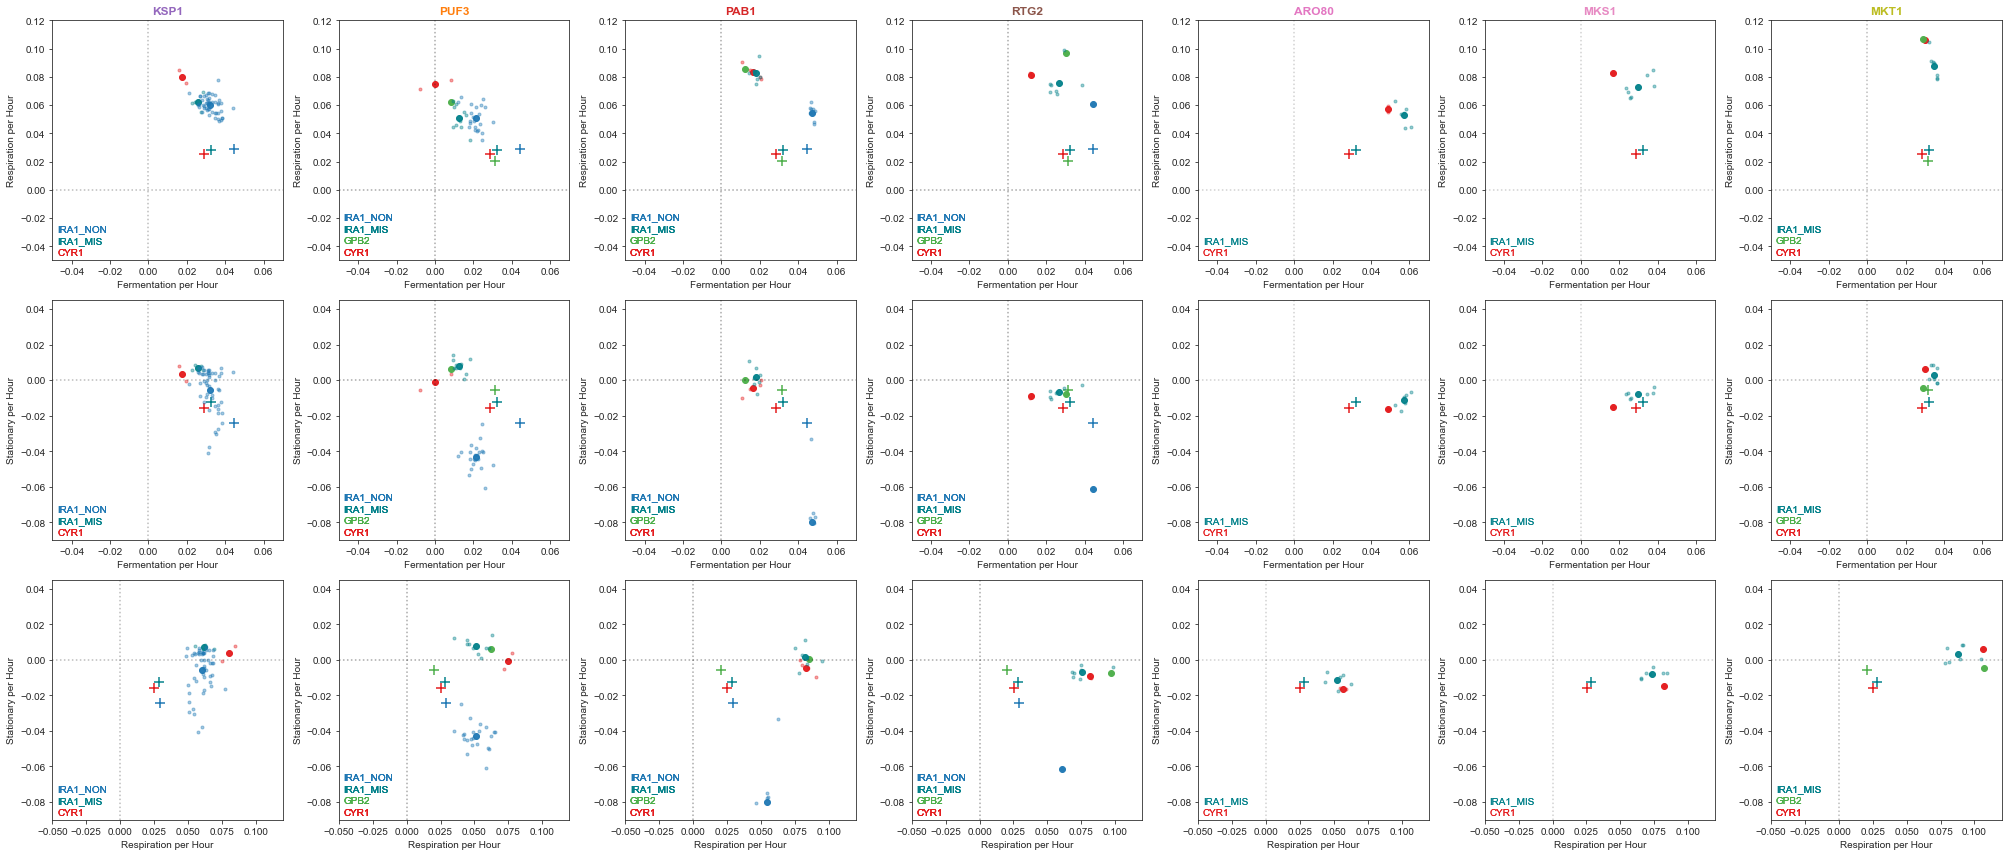

In [53]:

this_study = merged_fitness[merged_fitness['source_publication']=='This_study']

labels = {'FerPerHour':'Fermentation per Hour','ResPerHour':'Respiration per Hour','StaPerHour':'Stationary per Hour'}
lims = {'FerPerHour':[-0.05,0.07],'ResPerHour':[-0.05,0.12],'StaPerHour':[-0.09,0.045]}


plt.figure(figsize=(7*4,12))
# plt.suptitle(causal_gene)

gene_counter = 0
for causal_gene in putative_causal_genes:
    
    this_gene = this_study[this_study['gene']==causal_gene]
    
    ancestors_with_gene = np.unique(this_gene['ancestor'].values)
    
    if (len(ancestors_with_gene) > 1) and (len(this_gene)>4):
        
        for count,(xdata,ydata) in enumerate(combinations(['FerPerHour','ResPerHour','StaPerHour'],2)):
            
            c_difference_list = []
            for ancestor in ancestors_with_gene:
                
                background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[ancestor]]

                plt.subplot(3,7,7*count+gene_counter+1)
                if count == 0:
                    plt.title(causal_gene,color=tools.find_mutation_color(causal_gene),fontweight='bold')
                    
                plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=tools.anc_color_map[ancestor],s=100)
                
                this_anc = this_gene[this_gene['ancestor']==ancestor]
                
                centroid = tools.centroid(this_anc[[xdata,ydata]].values)

                plt.scatter(this_anc[xdata].values,this_anc[ydata].values,
                            color=tools.anc_color_map[ancestor],alpha=0.4,marker='.')
                
                plt.scatter(centroid[0],centroid[1],
                            color=tools.anc_color_map[ancestor],alpha=0.95,marker='o')
                
                plt.xlim(lims[xdata][0],lims[xdata][1])
                plt.ylim(lims[ydata][0],lims[ydata][1])
                
                plt.axhline(0,color='k',linestyle=':',alpha=0.1)
                plt.axvline(0,color='k',linestyle=':',alpha=0.1)



                plt.xlabel(labels[xdata])
                plt.ylabel(labels[ydata])
                
                
#                 plt.subplot(3,2,2*count+2)
                
                differences = (this_anc[xdata].values-background_mutant[xdata].values,
                               this_anc[ydata].values-background_mutant[ydata].values)
                
#                 plt.scatter(differences[0],differences[1],
#                             color=tools.anc_color_map[ancestor],alpha=0.4,marker='.')
                
                if len(differences[0]) > 0:
                    c_differences = (centroid[0]-background_mutant[xdata].values,
                               centroid[1]-background_mutant[ydata].values)
                
                    c_difference_list.append([c_differences[0][0],c_differences[1][0]])
#                     plt.scatter(c_differences[0],c_differences[1],
#                                 color=tools.anc_color_map[ancestor],alpha=0.95,marker='o')
                
#                 plt.xlim(lims[xdata][0],lims[xdata][1])
#                 plt.ylim(lims[ydata][0],lims[ydata][1])

#                 plt.xlabel(f'Change in {labels[xdata]}')
#                 plt.ylabel(f'Change in {labels[ydata]}')
                
#                 plt.axhline(color='k',linestyle=':',alpha=0.2)
#                 plt.axvline(color='k',linestyle=':',alpha=0.2)

                for g,anc in enumerate(ancestors_with_gene):
                    plt.text(y=0.02+0.05*g,x=0.02,s=f'{anc}',color=tools.anc_color_map[anc],transform=plt.gca().transAxes)

#         print(np.corrcoef(c_difference_list))
        gene_counter += 1 
    
        

                
plt.tight_layout()
plt.savefig(f'{home_dir}/figures/analysis/same_direction/same_direction_all.pdf',bbox_inches='tight')



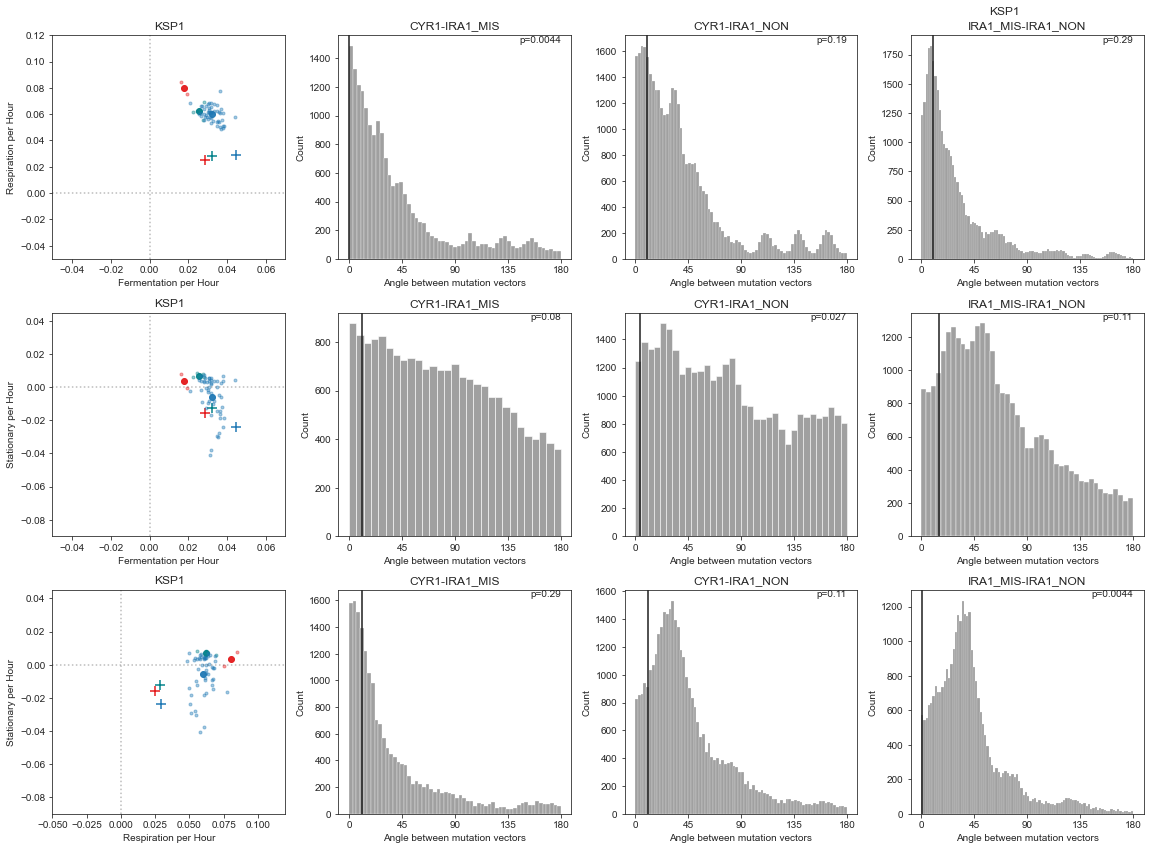

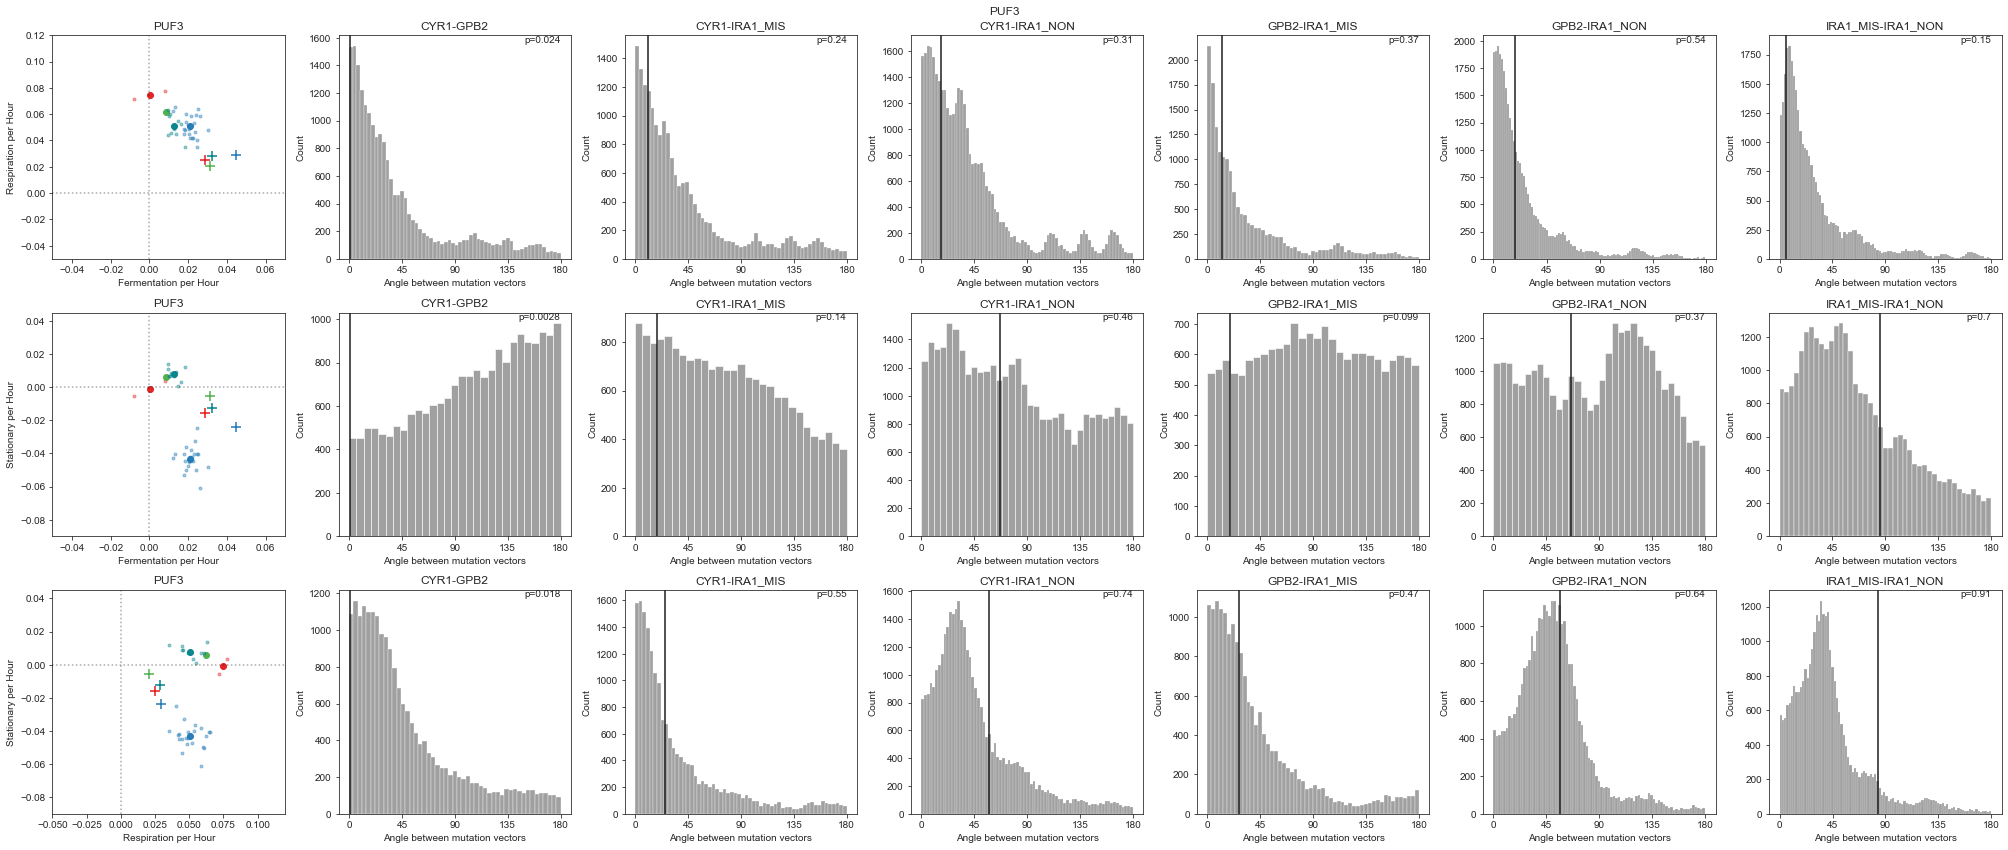

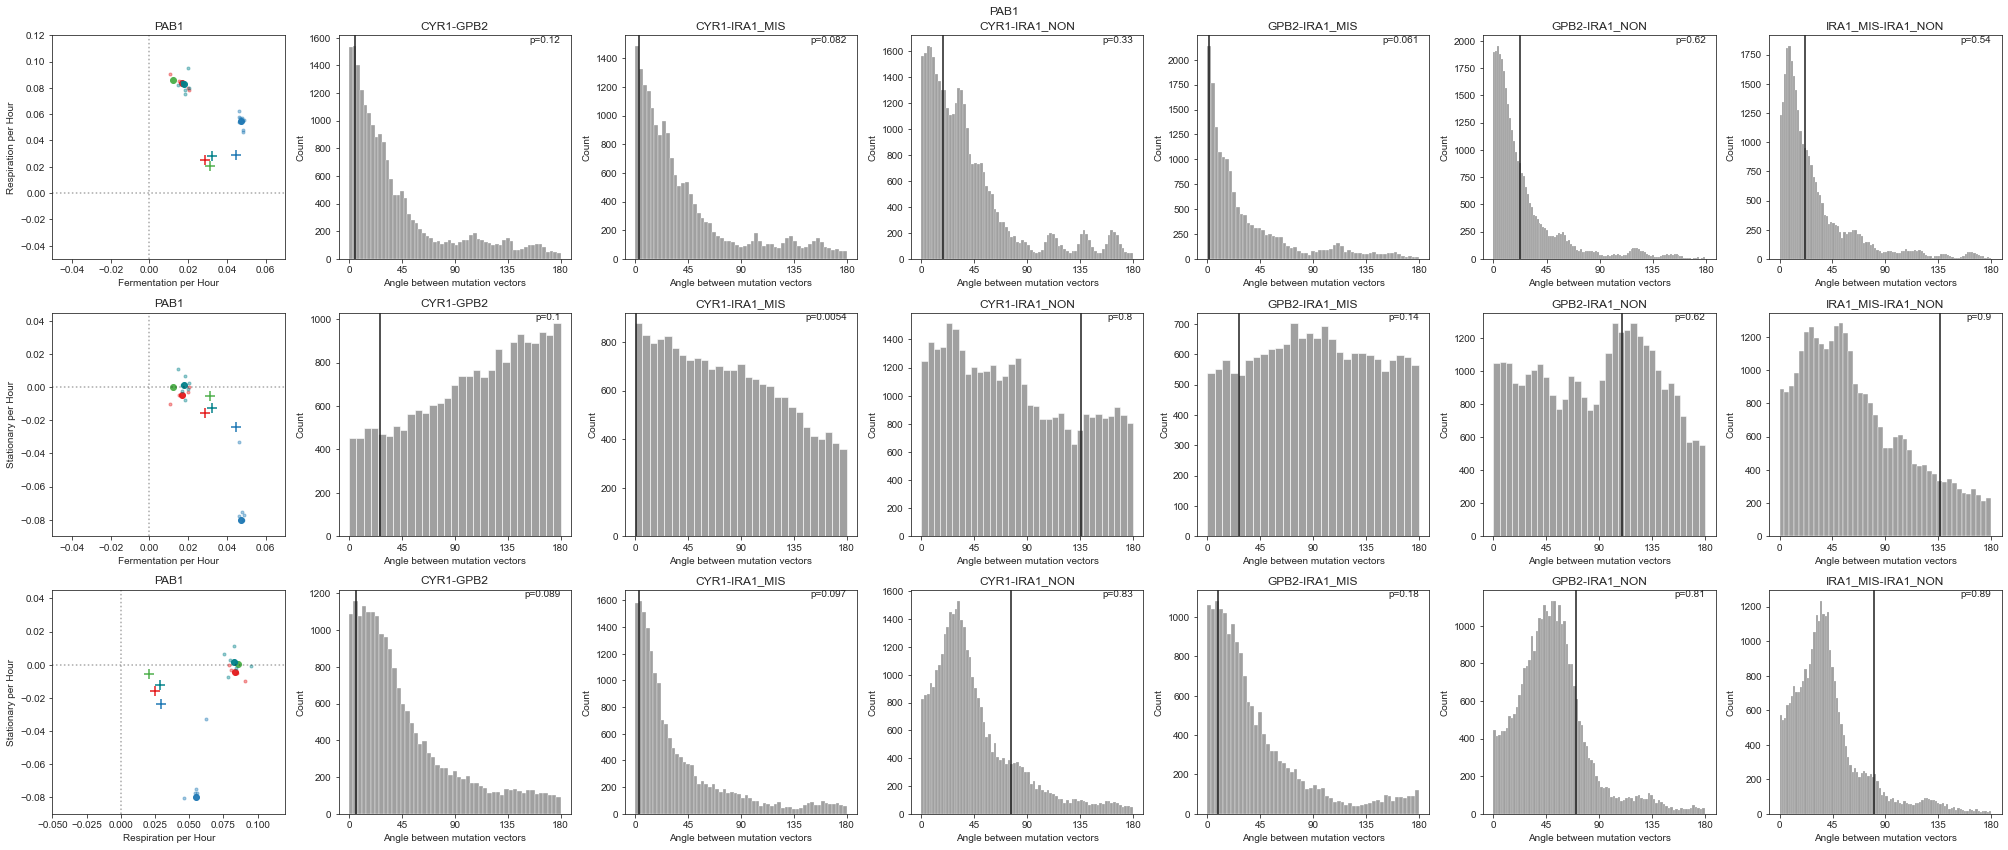

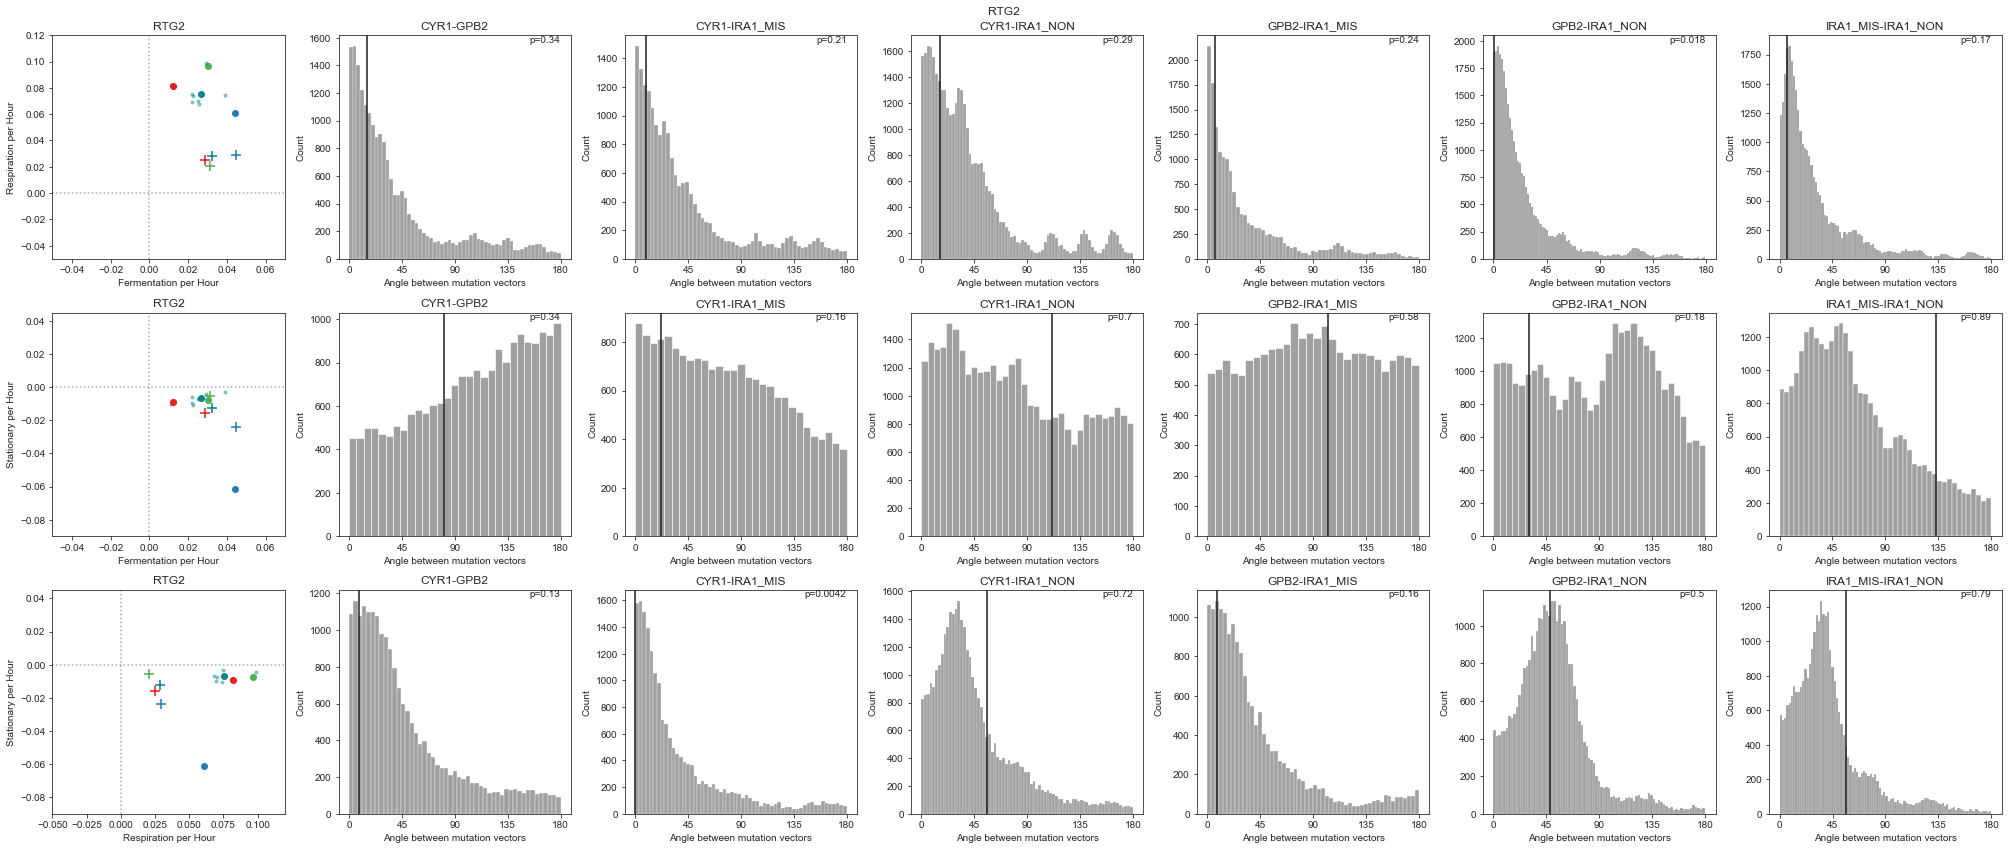

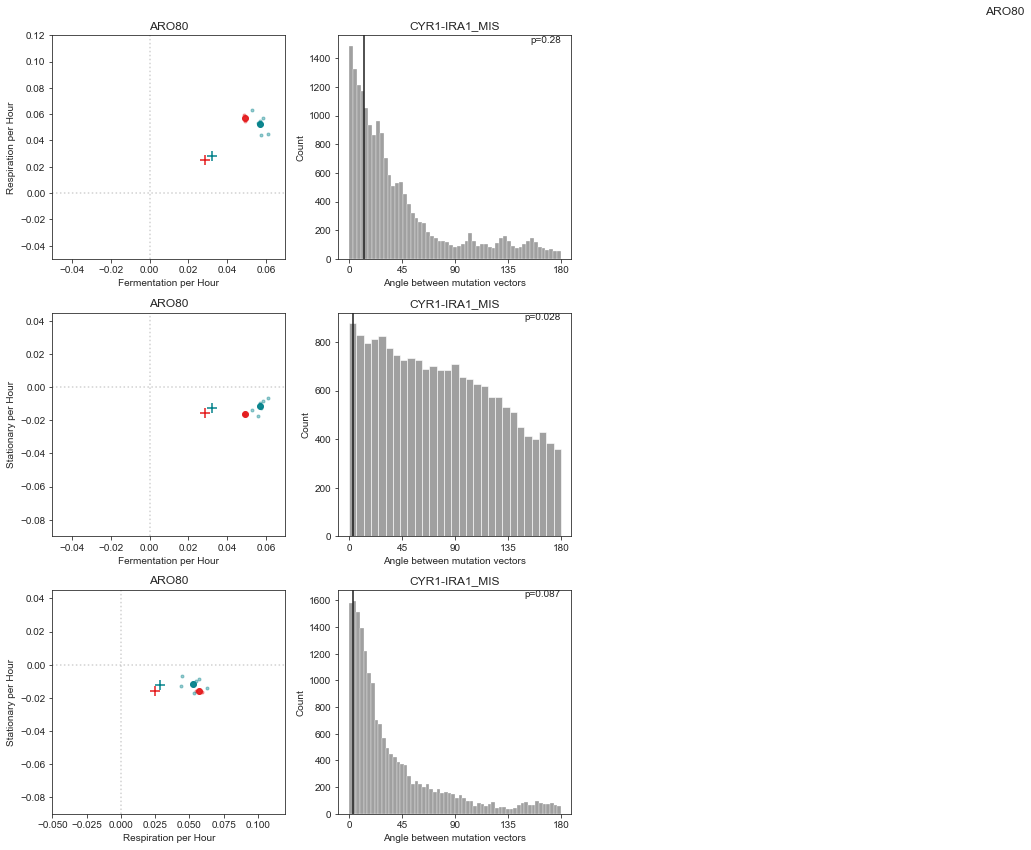

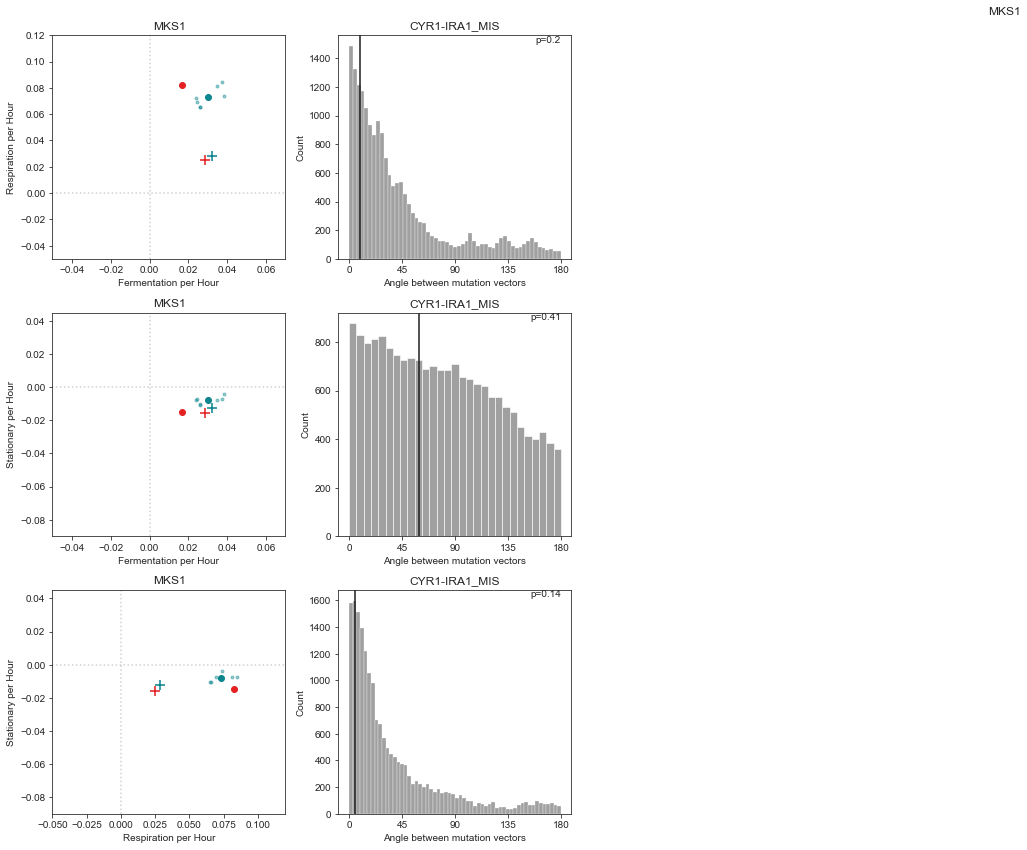

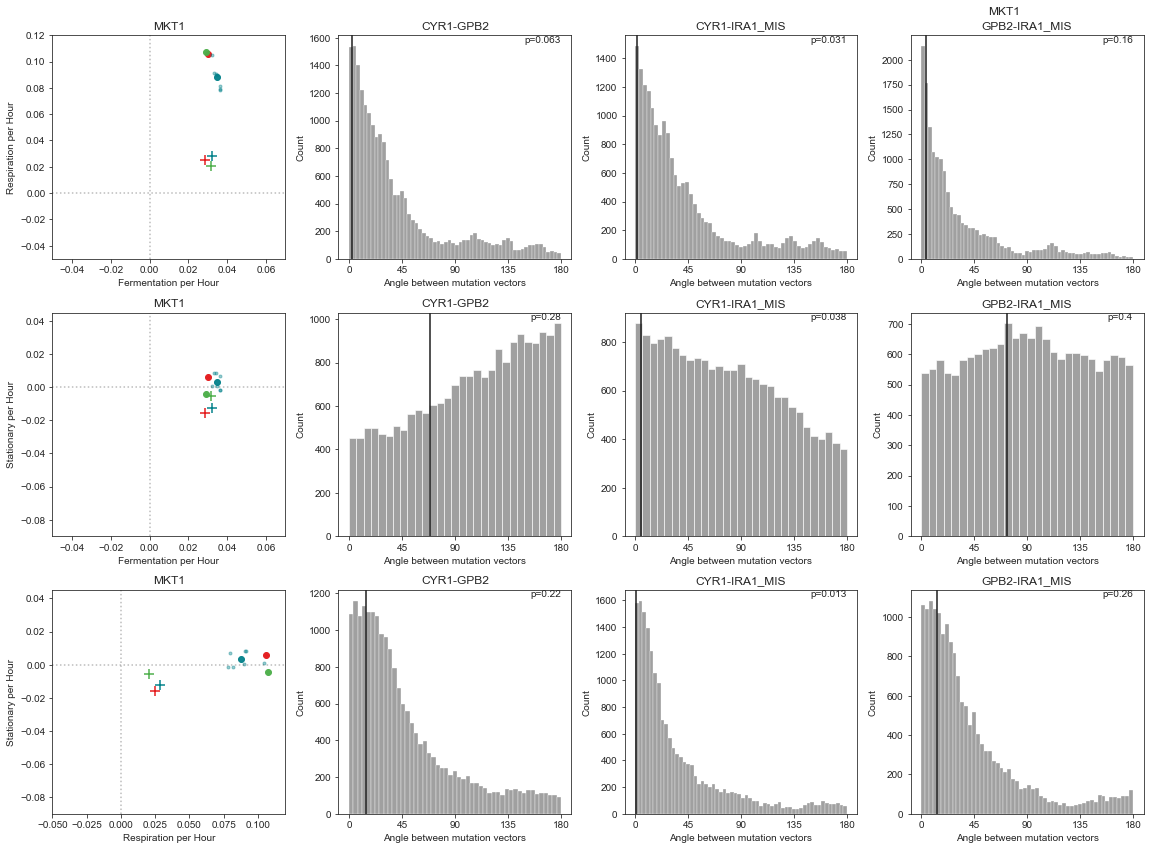

In [44]:

this_study = merged_fitness[merged_fitness['source_publication']=='This_study']

labels = {'FerPerHour':'Fermentation per Hour','ResPerHour':'Respiration per Hour','StaPerHour':'Stationary per Hour'}
lims = {'FerPerHour':[-0.05,0.07],'ResPerHour':[-0.05,0.12],'StaPerHour':[-0.09,0.045]}

for causal_gene in putative_causal_genes:
    
    this_gene = this_study[this_study['gene']==causal_gene]
    
    ancestors_with_gene = np.unique(this_gene['ancestor'].values)
    
    if (len(ancestors_with_gene) > 1) and (len(this_gene)>4):
        
        plt.figure(figsize=(7*4,3*4))
        plt.suptitle(causal_gene)
        
        for count,(xdata,ydata) in enumerate(combinations(['FerPerHour','ResPerHour','StaPerHour'],2)):
            
            c_difference_list = {}
            for ancestor in ancestors_with_gene:
                
                background_mutant = merged_fitness[merged_fitness['barcode']==tools.rebarcoding_source_mutants[ancestor]]

                plt.subplot(3,7,(7*count)+1)
                plt.title(causal_gene)
                    
                plt.scatter(background_mutant[xdata].values,background_mutant[ydata].values,
                            marker='+',color=tools.anc_color_map[ancestor],s=100)
                
                this_anc = this_gene[this_gene['ancestor']==ancestor]
                
                centroid = tools.centroid(this_anc[[xdata,ydata]].values)

                plt.scatter(this_anc[xdata].values,this_anc[ydata].values,
                            color=tools.anc_color_map[ancestor],alpha=0.4,marker='.')
                
                plt.scatter(centroid[0],centroid[1],
                            color=tools.anc_color_map[ancestor],alpha=0.95,marker='o')
                
                plt.xlim(lims[xdata][0],lims[xdata][1])
                plt.ylim(lims[ydata][0],lims[ydata][1])
                
                plt.axhline(0,color='k',linestyle=':',alpha=0.1)
                plt.axvline(0,color='k',linestyle=':',alpha=0.1)

                plt.xlabel(labels[xdata])
                plt.ylabel(labels[ydata])
                
#                 plt.subplot(3,2,2*count+2)
                
                differences = (this_anc[xdata].values-background_mutant[xdata].values,
                               this_anc[ydata].values-background_mutant[ydata].values)
                
#                 plt.scatter(differences[0],differences[1],
#                             color=tools.anc_color_map[ancestor],alpha=0.4,marker='.')
                
                if len(differences[0]) > 0:
                    c_differences = (centroid[0]-background_mutant[xdata].values,
                               centroid[1]-background_mutant[ydata].values)
                
                    c_difference_list[ancestor] = [c_differences[0][0],c_differences[1][0]]
                    
            for c,(anc1,anc2) in enumerate(combinations(ancestors_with_gene,2)):
                plt.subplot(3,7,(7*count)+c+2)
                plt.title(f'{anc1}-{anc2}')
                
                if f'{anc1}-{anc2}' in ancestor_paired_null_angles.keys():
                    sns.histplot(ancestor_paired_null_angles[f'{anc1}-{anc2}'][f'{xdata}-{ydata}'],color='gray')
                    
                    observed_angle = angle_between(c_difference_list[anc1],c_difference_list[anc2])
                    plt.axvline(observed_angle,color='k')
                    
                    count_less = np.sum(np.asarray(ancestor_paired_null_angles[f'{anc1}-{anc2}'][f'{xdata}-{ydata}'])<observed_angle)
                    empirical_p = (count_less+1)/(len(ancestor_paired_null_angles[f'{anc1}-{anc2}'][f'{xdata}-{ydata}'])+1)
                    
                    plt.text(x=180,y=plt.ylim()[1],va='top',ha='right',s=f'p={empirical_p:.2g}')
                    plt.xticks([0,45,90,135,180],[0,45,90,135,180])
                    plt.xlabel('Angle between mutation vectors')
                    plt.ylabel('Count')
                    
                else:
                    sns.histplot(ancestor_paired_null_angles[f'{anc2}-{anc1}'][f'{xdata}-{ydata}'],color='gray')
                    
                    observed_angle = angle_between(c_difference_list[anc1],c_difference_list[anc2])
                    plt.axvline(observed_angle,color='k')
                    
                    count_less = np.sum(np.asarray(ancestor_paired_null_angles[f'{anc2}-{anc1}'][f'{xdata}-{ydata}'])<observed_angle)
                    empirical_p = (count_less+1)/(len(ancestor_paired_null_angles[f'{anc2}-{anc1}'][f'{xdata}-{ydata}'])+1)
                    
                    plt.text(x=180,y=plt.ylim()[1],va='top',ha='right',s=f'p={empirical_p:.2g}')
                    plt.xticks([0,45,90,135,180],[0,45,90,135,180])
                    plt.xlabel('Angle between mutation vectors')
                    plt.ylabel('Count')

                
        plt.tight_layout()
        plt.savefig(f'{home_dir}/figures/analysis/same_direction/same_direction_{causal_gene}_angles.pdf',bbox_inches='tight')




In [21]:
np.correlate(np.asarray(c_difference_list)[1],np.asarray(c_difference_list)[2])

array([0.00517223])

In [22]:
np.correlate(np.asarray(c_difference_list)[0],np.asarray(c_difference_list)[1])

array([0.00702817])

In [33]:
angle_between(np.asarray(c_difference_list)[0],np.asarray(c_difference_list)[1])

14.323583045133391

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

<AxesSubplot:ylabel='Density'>

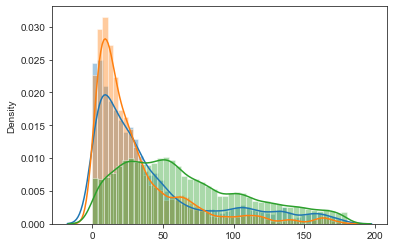

In [27]:
sns.distplot(ancestor_paired_null_angles['GPB2-CYR1']['FerPerHour-ResPerHour'])
sns.distplot(ancestor_paired_null_angles['IRA1_MIS-IRA1_NON']['FerPerHour-ResPerHour'])
sns.distplot(ancestor_paired_null_angles['IRA1_MIS-IRA1_NON']['FerPerHour-StaPerHour'])
# sns.distplot(ancestor_paired_null_angles['GPB2-CYR1']['FerPerHour-ResPerHour'])
# sns.distplot(ancestor_paired_null_angles['GPB2-CYR1']['FerPerHour-ResPerHour'])